In [14]:
import textacy
import pandas as pd
from textacy.extract import keyterms as kt

In [15]:
from load_data import get_df
df = get_df()
df.reset_index(inplace=True)

In [16]:
terms = []
en = textacy.load_spacy_lang("en_core_web_sm", disable=("parser",))
for index in range(len(df)):
    doc = textacy.make_spacy_doc(df['Article'][index], lang=en)
    output = kt.textrank(
        doc,
        normalize="lemma",
        window_size=10,
        edge_weighting="count",
        position_bias=True,
        topn=5,
    )
    for i in range(len(output)):
        terms.append(output[i][0])

In [17]:
len(terms)

3670

In [18]:
terms[:20]

['Covid-19 pandemic present Emerging market',
 'high energy price',
 'energy price pressure',
 'expansionary fiscal policy',
 'review subsidy programmessharp price increase',
 'Queen Elizabeth II',
 'international medium house',
 'news',
 'british colonial rule',
 'british trade point',
 'temple committee member',
 'unidentified miscreant',
 'Dauti Kali Mandir',
 'broken idol',
 'Shailkupa upazila',
 'Dhaka Medical College Hospital',
 'BCL Organising Secretary Nazim Uddin',
 'Dhaka court',
 'case statement',
 'case today']

In [19]:
corpus = terms

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
cv = CountVectorizer(
    max_df=0.8,
    max_features=1000,
    ngram_range=(1,3)
)

In [22]:
X = cv.fit_transform(corpus)

In [23]:
list(cv.vocabulary_.keys())[:10]

['covid',
 '19',
 'market',
 'covid 19',
 'high',
 'energy',
 'price',
 'subsidy',
 'increase',
 'ii']

[Text(0, 0, 'bangladesh'),
 Text(1, 0, 'yesterday'),
 Text(2, 0, 'dhaka'),
 Text(3, 0, 'world'),
 Text(4, 0, 'new'),
 Text(5, 0, 'police'),
 Text(6, 0, 'league'),
 Text(7, 0, 'minister'),
 Text(8, 0, 'election'),
 Text(9, 0, 'today'),
 Text(10, 0, 'station'),
 Text(11, 0, 'bank'),
 Text(12, 0, 'project'),
 Text(13, 0, 'film'),
 Text(14, 0, 'president'),
 Text(15, 0, 'price'),
 Text(16, 0, 'islam'),
 Text(17, 0, 'md'),
 Text(18, 0, 'cup'),
 Text(19, 0, 'national')]

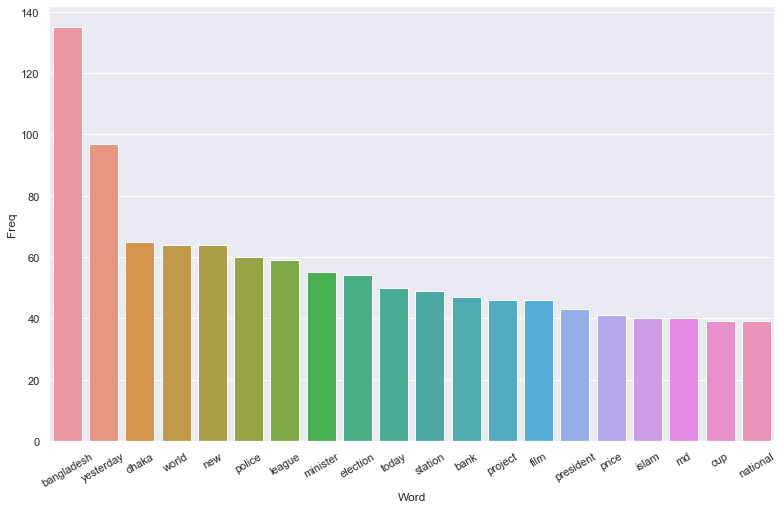

In [24]:
# Most frequently occuring words
import seaborn as sns


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)

    sum_words = bag_of_words.sum(axis=0)

    words_freq = [
        (word, sum_words[0, idx]) for word, idx in
        vec.vocabulary_.items()
    ]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns = ["Word", "Freq"]

#Barplot of most freq words
sns.set(rc={'figure.figsize': (13, 8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

                  Bi-gram  Freq
0          police station    38
1               world cup    37
2          prime minister    23
3           mental health    20
4             new zealand    18
5               t20 world    15
6           sheikh hasina    15
7   election commissioner    14
8         minister sheikh    14
9         medical college    13
10       college hospital    13
11         chhatra league    13
12        positivity rate    13
13            power plant    13
14         stock exchange    13
15       champions league    11
16            human right    11
17      general secretary    11
18       foreign minister    10
19        bangladesh bank    10


[Text(0, 0, 'police station'),
 Text(1, 0, 'world cup'),
 Text(2, 0, 'prime minister'),
 Text(3, 0, 'mental health'),
 Text(4, 0, 'new zealand'),
 Text(5, 0, 't20 world'),
 Text(6, 0, 'sheikh hasina'),
 Text(7, 0, 'election commissioner'),
 Text(8, 0, 'minister sheikh'),
 Text(9, 0, 'medical college'),
 Text(10, 0, 'college hospital'),
 Text(11, 0, 'chhatra league'),
 Text(12, 0, 'positivity rate'),
 Text(13, 0, 'power plant'),
 Text(14, 0, 'stock exchange'),
 Text(15, 0, 'champions league'),
 Text(16, 0, 'human right'),
 Text(17, 0, 'general secretary'),
 Text(18, 0, 'foreign minister'),
 Text(19, 0, 'bangladesh bank')]

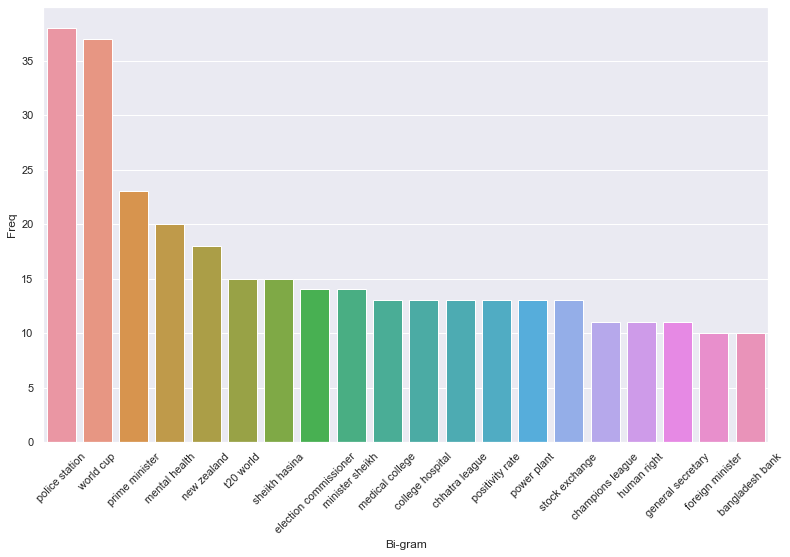

In [25]:
#Most frequently occuring Bi-grams

def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2, 2),
                           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
sns.set(rc={'figure.figsize': (13, 8)})
h = sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)


                       Tri-gram  Freq
0                 t20 world cup    15
1         prime minister sheikh    14
2        minister sheikh hasina    14
3      medical college hospital    13
4          sadar police station     9
5               shakib al hasan     9
6                ak abdul momen     9
7      president vladimir putin     8
8   chief election commissioner     8
9         dhaka medical college     7
10   russian president vladimir     7
11           twenty20 world cup     7
12   bangabandhu sheikh mujibur     7
13        sheikh mujibur rahman     7
14          mental health issue     6
15            kazi habibul awal     6
16          foreign minister ak     6
17            minister ak abdul     6
18        daily positivity rate     6
19            nurul hasan sohan     5


[Text(0, 0, 't20 world cup'),
 Text(1, 0, 'prime minister sheikh'),
 Text(2, 0, 'minister sheikh hasina'),
 Text(3, 0, 'medical college hospital'),
 Text(4, 0, 'sadar police station'),
 Text(5, 0, 'shakib al hasan'),
 Text(6, 0, 'ak abdul momen'),
 Text(7, 0, 'president vladimir putin'),
 Text(8, 0, 'chief election commissioner'),
 Text(9, 0, 'dhaka medical college'),
 Text(10, 0, 'russian president vladimir'),
 Text(11, 0, 'twenty20 world cup'),
 Text(12, 0, 'bangabandhu sheikh mujibur'),
 Text(13, 0, 'sheikh mujibur rahman'),
 Text(14, 0, 'mental health issue'),
 Text(15, 0, 'kazi habibul awal'),
 Text(16, 0, 'foreign minister ak'),
 Text(17, 0, 'minister ak abdul'),
 Text(18, 0, 'daily positivity rate'),
 Text(19, 0, 'nurul hasan sohan')]

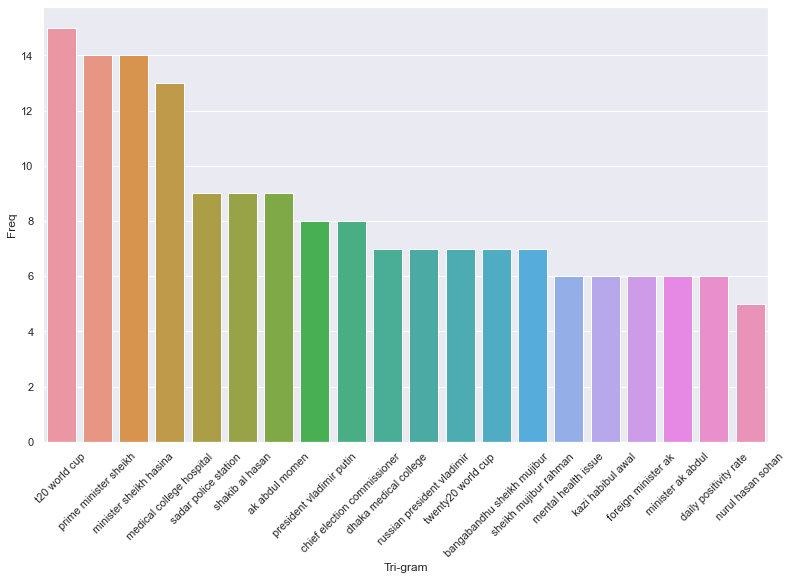

In [26]:
#Most frequently occuring Tri-grams

def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3, 3),
                           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in
                  vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns = ["Tri-gram", "Freq"]
print(top3_df)
#Barplot of most freq Tri-grams
sns.set(rc={'figure.figsize': (13, 8)})
j = sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)
